In [3]:
import pandas as pd

# Load the training and testing datasets / Muat dataset training dan testing
train_file_path = 'Dataset/df_train.csv'
test_file_path = 'Dataset/df_test.csv'

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# Tampilken baris awal dari dataset training dan testing 
train_preview = df_train.head()
test_preview = df_test.head()

train_preview, test_preview


(         date     price  bedrooms  grade  has_basement  living_in_m2  \
 0  2014-05-15  312000.0         2      2          True     138.42547   
 1  2014-11-14  310000.0         2      2         False     105.90942   
 2  2014-12-24  320000.0         2      2         False     117.98681   
 3  2015-02-22  264500.0         2      3         False     151.43189   
 4  2015-01-06  700000.0         3      2          True     341.88304   
 
    renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
 0      False      False              False               2          True   
 1      False      False              False               1          True   
 2      False       True              False               1         False   
 3      False      False              False               2          True   
 4      False      False              False               3         False   
 
    single_floor  month  quartile_zone  
 0         False      5              1  
 1         Fal

In [5]:
# Data Preprocessing

# Pilih fitur yang relevan dan variabel target
features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2', 'renovated', 
            'nice_view', 'perfect_condition', 'real_bathrooms', 
            'has_lavatory', 'single_floor', 'month', 'quartile_zone']
target = 'price'

# Ekstrak fitur dan variabel target untuk dataset training dan testing 
X_train = df_train[features].head(100)  # Batasi ke 100 record
y_train = df_train[target].head(100)
X_test = df_test[features]
y_test = df_test[target]

# Penanganan missing value
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Tampilken data yang sudah di proses
X_train.head(), y_train.head(), X_test.head(), y_test.head()


(   bedrooms  grade  has_basement  living_in_m2  renovated  nice_view  \
 0         2      2          True     138.42547      False      False   
 1         2      2         False     105.90942      False      False   
 2         2      2         False     117.98681      False       True   
 3         2      3         False     151.43189      False      False   
 4         3      2          True     341.88304      False      False   
 
    perfect_condition  real_bathrooms  has_lavatory  single_floor  month  \
 0              False               2          True         False      5   
 1              False               1          True         False     11   
 2              False               1         False          True     12   
 3              False               2          True          True      2   
 4              False               3         False         False      1   
 
    quartile_zone  
 0              1  
 1              3  
 2              2  
 3              1  
 4

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Model yang dipakai: Simple Linear Regression

# Inisialisasi model linear regression
linear_reg_model = LinearRegression()

# Train model menggunakan data training
linear_reg_model.fit(X_train[['living_in_m2']], y_train)

# Predict house prices on the test data using the trained model / Prediksi harga rumah pada data test menggunakan model yang sudah di train
y_pred = linear_reg_model.predict(X_test[['living_in_m2']])

# Evaluasi performa
# Kalkulasi metrik performa
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print performance metrics
mse, rmse, r_squared


(np.float64(28079785339.764393),
 np.float64(167570.24001822158),
 0.35116587970884283)

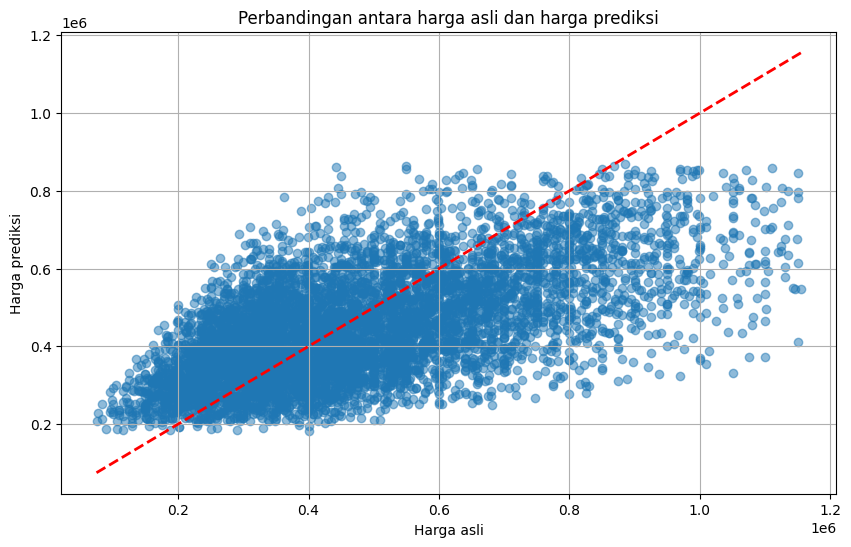

In [9]:
# Visualisasi perbandingan antara harga asli dan prediksi

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Harga asli")
plt.ylabel("Harga prediksi")
plt.title("Perbandingan antara harga asli dan harga prediksi")
plt.grid(True)
plt.show()


In [10]:
# Menggunakan Multiple Linear Regression sebagai perbandingan

multi_linear_reg_model = LinearRegression()

multi_linear_reg_model.fit(X_train, y_train)

y_pred_multi = multi_linear_reg_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r_squared_multi = r2_score(y_test, y_pred_multi)

mse_multi, rmse_multi, r_squared_multi


(np.float64(12476884106.022089),
 np.float64(111699.97361692655),
 0.7116990737304016)

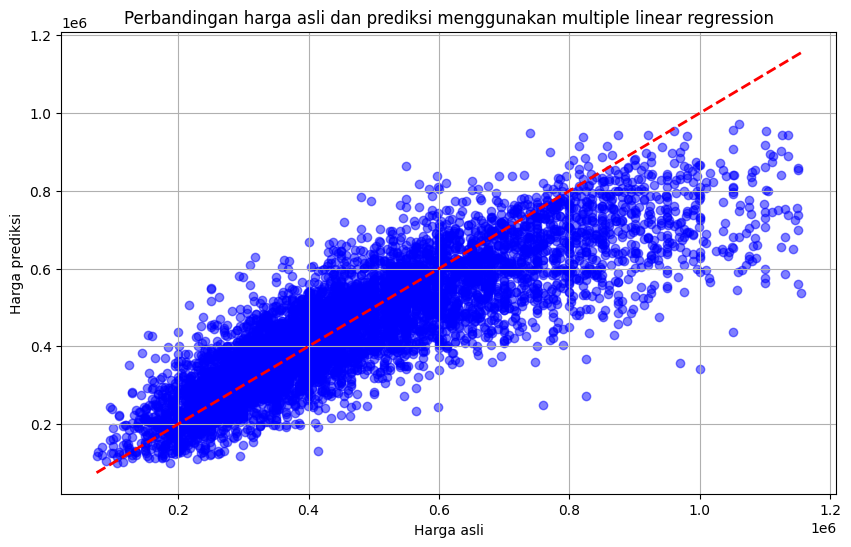

In [11]:
# Perbandingan antara harga asli dan harga prediksi menggunakan multiple linear regression

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Harga asli")
plt.ylabel("Harga prediksi")
plt.title("Perbandingan harga asli dan prediksi menggunakan multiple linear regression")
plt.grid(True)
plt.show()
